In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import date2num

<font color='blue' size="5">PREPARING DATA</font>

In [2]:
df1=pd.read_excel('https://github.com/handery1997/testmomo/blob/main/MoMo%20Data%20Analyst%20Intern%20-%20Test.xlsx?raw=true',sheet_name='Part_2_Analytics_transaction_da')

In [3]:
df2=pd.read_excel('https://github.com/handery1997/testmomo/blob/main/MoMo%20Data%20Analyst%20Intern%20-%20Test.xlsx?raw=true',sheet_name='Part_2_Analytics_user_data')

In [4]:
df1.sort_values(by=['USER_ID']).head()

,USER_ID,DATE,TRANS_ID,MERCHANT_TYPE,SHOP_TYPE,TRANSACTION_VALUE,REVENUE
1263,594570,2020-08-08,6621160094,Super Market,1,37.63,5.23
5121,594570,2020-08-18,6740360086,Convenience Store,4,1046.06,6.52
5912,594570,2020-08-20,6760844752,Super Market,3,69.07,5.24
9066,594570,2020-08-25,6831001289,Convenience Store,4,535.30,5.23
6565,594570,2020-08-21,6777000149,Convenience Store,4,118.54,5.23


In [5]:
df2.head()

,USER_ID,LOCATION
0,45329393,Hanoi
1,54149991,Ho Chi Minh
2,41599207,Ho Chi Minh
3,17626493,Ho Chi Minh
4,51032030,Others


In [6]:
df1.isnull().sum()

USER_ID                0
DATE                   0
TRANS_ID               0
MERCHANT_TYPE        493
SHOP_TYPE              0
TRANSACTION_VALUE      5
REVENUE                5
dtype: int64

In [102]:
df1.shape

(15515, 7)

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

USER_ID              0
DATE                 0
TRANS_ID             0
MERCHANT_TYPE        0
SHOP_TYPE            0
TRANSACTION_VALUE    0
REVENUE              0
dtype: int64

In [9]:
df=pd.merge(df1,df2,on='USER_ID')

In [10]:
df=df[['USER_ID','DATE','MERCHANT_TYPE','REVENUE','LOCATION','SHOP_TYPE']]

In [11]:
df.head()

,USER_ID,DATE,MERCHANT_TYPE,REVENUE,LOCATION,SHOP_TYPE
0,45329393,2020-08-01,Super Market,6.13,Hanoi,1
1,45329393,2020-08-01,Super Market,4.83,Hanoi,1
2,45329393,2020-08-01,Super Market,5.27,Hanoi,1
3,45329393,2020-08-01,Super Market,4.66,Hanoi,1
4,45329393,2020-08-01,Super Market,6.13,Hanoi,1


In [12]:
group1=df.groupby(['DATE','USER_ID'])['USER_ID'].nunique()

In [13]:
group1.head()

DATE        USER_ID 
2020-08-01  1205154     1
            1807071     1
            6650139     1
            17626493    1
            17878566    1
Name: USER_ID, dtype: int64

In [14]:
df3=pd.DataFrame(group1)

In [15]:
df3=df3.rename(columns={"USER_ID": "USER_ID1"})

In [16]:
df3.drop('USER_ID1',axis=1,inplace=True)

In [17]:
df3.head()

Empty DataFrame
Columns: []
Index: [(2020-08-01 00:00:00, 1205154), (2020-08-01 00:00:00, 1807071), (2020-08-01 00:00:00, 6650139), (2020-08-01 00:00:00, 17626493), (2020-08-01 00:00:00, 17878566)]

In [18]:
df3.reset_index(inplace=True)

In [19]:
df3['DATE'] = pd.to_datetime(df3['DATE'], errors ='coerce') 
  
# extracting the week from the date 
df3['DATE']=df3['DATE'].dt.week 

In [20]:
df3

,DATE,USER_ID
0,31,1205154
1,31,1807071
2,31,6650139
3,31,17626493
4,31,17878566
5,31,22708464
6,31,25781781
7,31,26448872
8,31,27919612
9,31,29549527


In [21]:
df3=df3.rename(columns={"DATE": "WEEK"})

In [22]:
df3.head()

,WEEK,USER_ID
0,31,1205154
1,31,1807071
2,31,6650139
3,31,17626493
4,31,17878566


<font color='blue' size="5">ANALYZE RETENTION RATE WITH PERIOD = WEEK </font>

In [23]:
grouping1 = df3.groupby('USER_ID')['WEEK']

In [24]:
df3['CohortWeek'] = grouping1.transform('min')

In [25]:
df3.head()

,WEEK,USER_ID,CohortWeek
0,31,1205154,31
1,31,1807071,31
2,31,6650139,31
3,31,17626493,31
4,31,17878566,31


In [26]:
df3['period_week'] = df3.WEEK - df3.CohortWeek+1

In [27]:
df3.head()

,WEEK,USER_ID,CohortWeek,period_week
0,31,1205154,31,1
1,31,1807071,31,1
2,31,6650139,31,1
3,31,17626493,31,1
4,31,17878566,31,1


In [28]:
grouping_count = df3.groupby(['CohortWeek', 'period_week'])
cohort_data = grouping_count['USER_ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortWeek',
                                  columns='period_week',
                                  values='USER_ID')
cohort_counts

period_week,1,2,3,4,5,6,7,8
CohortWeek,,,,,,,,
31,103.0,64.0,46.0,44.0,43.0,23.0,26.0,6.0
32,366.0,197.0,141.0,150.0,83.0,75.0,39.0,NaN
33,548.0,238.0,199.0,108.0,126.0,66.0,NaN,NaN
34,473.0,215.0,109.0,81.0,34.0,NaN,NaN,NaN
35,390.0,88.0,66.0,29.0,NaN,NaN,NaN,NaN
36,65.0,11.0,4.0,NaN,NaN,NaN,NaN,NaN
37,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
38,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
base = cohort_counts[1]
retention = cohort_counts.divide(base, axis=0).round(3)

In [30]:
retention

period_week,1,2,3,4,5,6,7,8
CohortWeek,,,,,,,,
31,1.0,0.621,0.447,0.427,0.417,0.223,0.252,0.058
32,1.0,0.538,0.385,0.410,0.227,0.205,0.107,NaN
33,1.0,0.434,0.363,0.197,0.230,0.120,NaN,NaN
34,1.0,0.455,0.230,0.171,0.072,NaN,NaN,NaN
35,1.0,0.226,0.169,0.074,NaN,NaN,NaN,NaN
36,1.0,0.169,0.062,NaN,NaN,NaN,NaN,NaN
37,1.0,0.600,NaN,NaN,NaN,NaN,NaN,NaN
38,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='blue' size="5">HEAT MAP OF RETENTION USERS WITH PERIOD = WEEK </font>

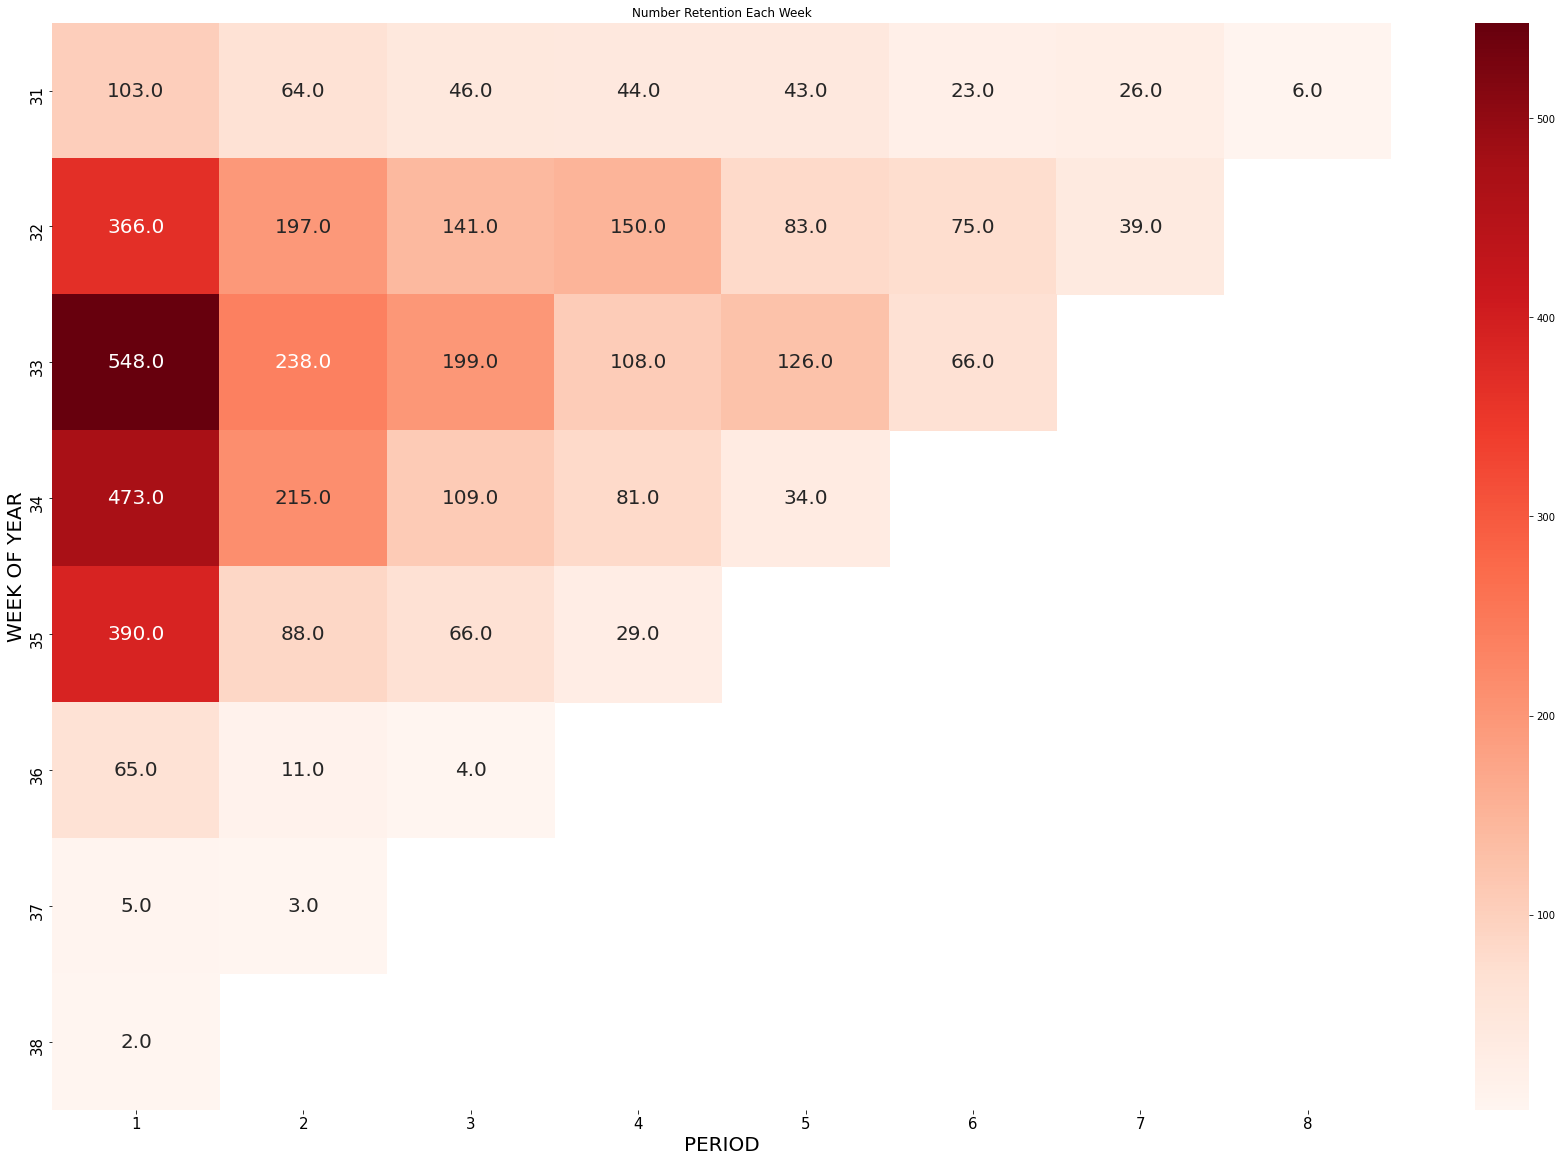

In [101]:
plt.figure(figsize=(30,20))
plt.title('Number Retention Each Week')
ax = sns.heatmap(data=cohort_counts,annot= True, fmt='.1f',cmap='Reds',annot_kws={"fontsize":20})
ax.set_yticklabels(cohort_counts.index)
ax.tick_params(labelsize=15)
ax.set_xlabel('PERIOD', FontSize=20)
ax.set_ylabel('WEEK OF YEAR', FontSize=20)
fig=ax.get_figure()
fig.savefig("Retentionvalue_each_week.png")
plt.show()

<font color='blue' size="5">HEAT MAP OF RETENTION RATE WITH PERIOD = WEEK </font>

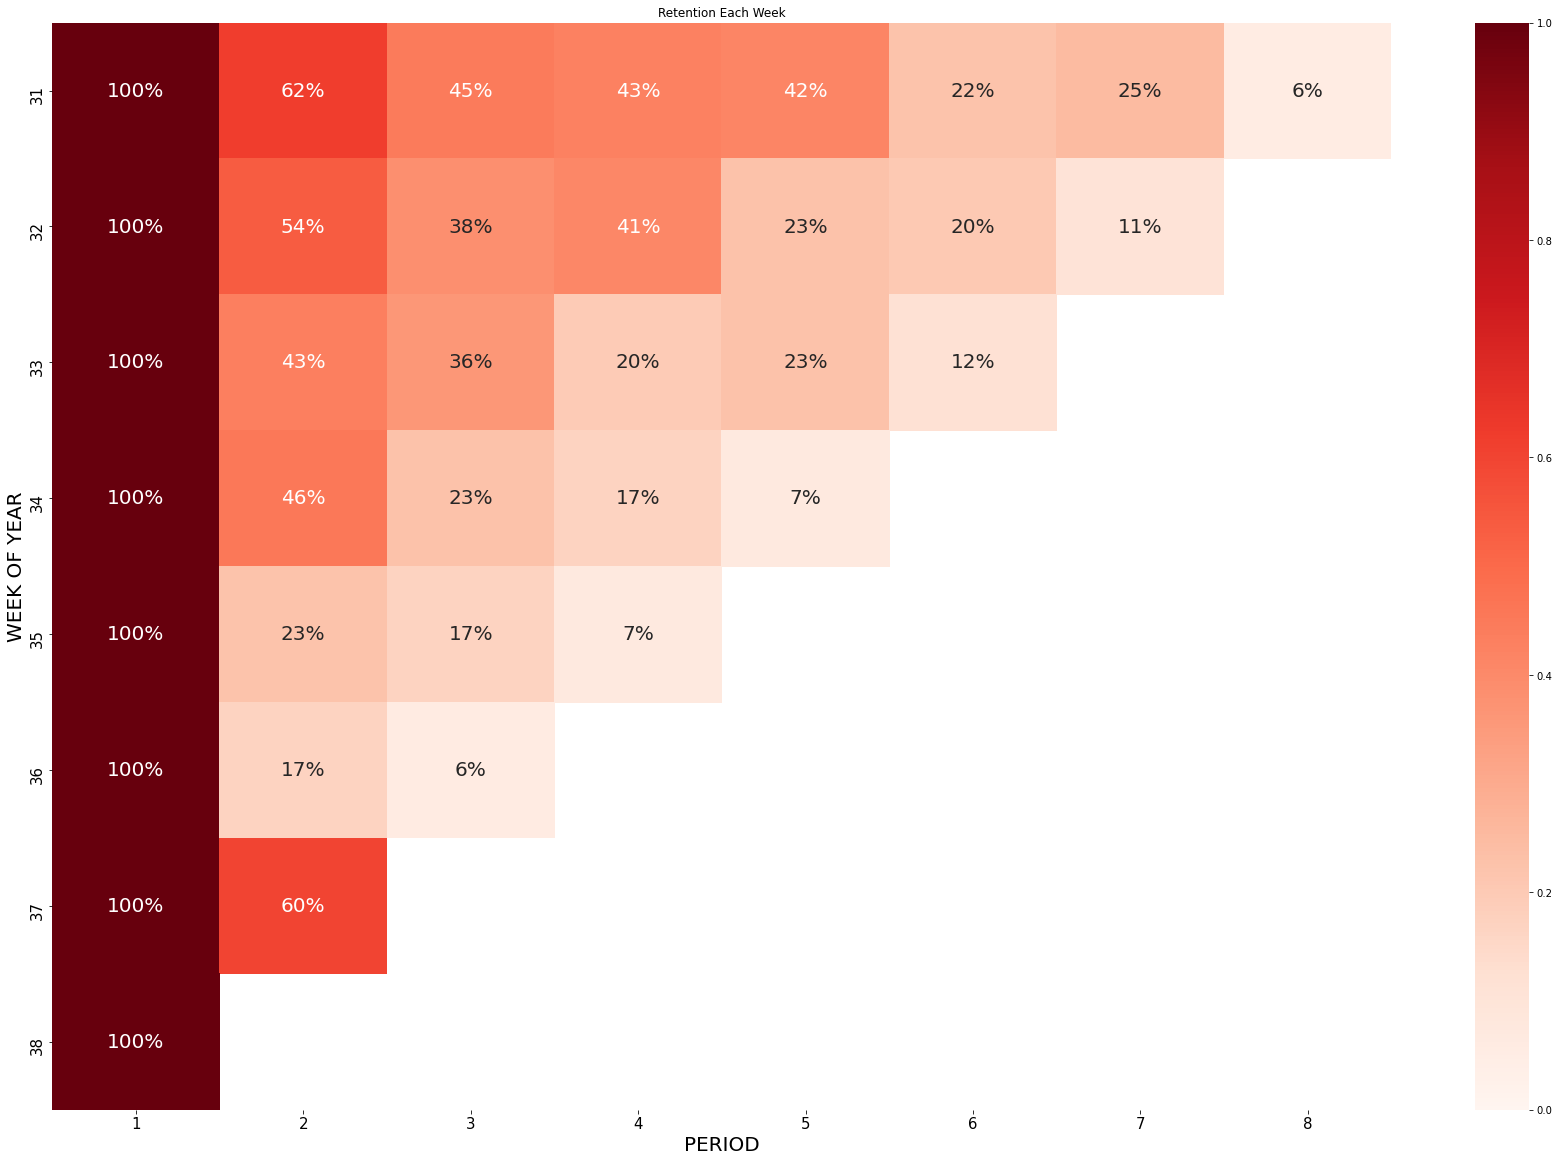

In [100]:
plt.figure(figsize=(30,20))
plt.title('Retention Each Week')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds',annot_kws={"fontsize":20})
ax.set_yticklabels(retention.index)
ax.tick_params(labelsize=15)
ax.set_xlabel('PERIOD', FontSize=20)
ax.set_ylabel('WEEK OF YEAR', FontSize=20)
fig=ax.get_figure()
fig.savefig("Retention_each_week.png")
plt.show()

<font color='blue' size="5">ANALYZE RETENTION WITH PERIOD = DAY </font>


In [33]:
df4=pd.DataFrame(group1)

In [34]:
df4

USER_ID
DATE       USER_ID          
2020-08-01 1205154         1
           1807071         1
           6650139         1
           17626493        1
           17878566        1
           22708464        1
           25781781        1
           26448872        1
           27919612        1
           29549527        1
           29901763        1
           31182817        1
           35161402        1
           37565139        1
           37783756        1
           38726633        1
           38733061        1
           41252959        1
           41423534        1
           41599207        1
           43072352        1
           43730032        1
           44693856        1
           45233060        1
           45329393        1
           45762807        1
           46138503        1
           47379001        1
           47850828        1
           48178627        1
...                      ...
2020-09-15 57956482        1
           57973675        1
           57995064        1
           58002401        1
           58008135        1
           58018446        1
           58045744        1
           58057273        1
           58076763        1
           58089373        1
           58120460        1
           58128577        1
           58130434        1
           58139209        1
           58167967        1
           58175797        1
           58180765        1
           58198951        1
           58225075        1
           58228213        1
           58290541        1
           58293094        1
           58298341        1
           58326762        1
           58356120        1
           58361046        1
           58379587        1
           58509030        1
           58582537        1
           58612334        1

[7982 rows x 1 columns]

In [35]:
df4=df4.rename(columns={"USER_ID": "USER_ID1"})

In [36]:
df4.reset_index(inplace=True)

In [37]:
df4.drop('USER_ID1',axis=1,inplace=True)

In [38]:
df4

,DATE,USER_ID
0,2020-08-01,1205154
1,2020-08-01,1807071
2,2020-08-01,6650139
3,2020-08-01,17626493
4,2020-08-01,17878566
5,2020-08-01,22708464
6,2020-08-01,25781781
7,2020-08-01,26448872
8,2020-08-01,27919612
9,2020-08-01,29549527


In [39]:
grouping2 = df4.groupby('USER_ID')['DATE']

In [40]:
df4['CohortDay'] = grouping2.transform('min')

In [41]:
df4

,DATE,USER_ID,CohortDay
0,2020-08-01,1205154,2020-08-01
1,2020-08-01,1807071,2020-08-01
2,2020-08-01,6650139,2020-08-01
3,2020-08-01,17626493,2020-08-01
4,2020-08-01,17878566,2020-08-01
5,2020-08-01,22708464,2020-08-01
6,2020-08-01,25781781,2020-08-01
7,2020-08-01,26448872,2020-08-01
8,2020-08-01,27919612,2020-08-01
9,2020-08-01,29549527,2020-08-01


In [42]:
df4['DATE'] = pd.to_datetime(df4['DATE'])
df4['CohortDay'] = pd.to_datetime(df4['CohortDay'])
df4['period_day'] = (df4['DATE'] - df4['CohortDay']).dt.days+1

In [43]:
df4

,DATE,USER_ID,CohortDay,period_day
0,2020-08-01,1205154,2020-08-01,1
1,2020-08-01,1807071,2020-08-01,1
2,2020-08-01,6650139,2020-08-01,1
3,2020-08-01,17626493,2020-08-01,1
4,2020-08-01,17878566,2020-08-01,1
5,2020-08-01,22708464,2020-08-01,1
6,2020-08-01,25781781,2020-08-01,1
7,2020-08-01,26448872,2020-08-01,1
8,2020-08-01,27919612,2020-08-01,1
9,2020-08-01,29549527,2020-08-01,1


In [44]:
grouping_count2 = df4.groupby(['CohortDay', 'period_day'])
cohort_data2 = grouping_count2['USER_ID'].apply(pd.Series.nunique)
cohort_data2 = cohort_data2.reset_index()
cohort_counts2 = cohort_data2.pivot(index='CohortDay',
                                  columns='period_day',
                                  values='USER_ID')
cohort_counts2

period_day,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
CohortDay,,,,,,,,,,,,,,,,,,,,,
2020-08-01,53.0,18.0,13.0,13.0,6.0,10.0,7.0,11.0,7.0,8.0,...,2.0,3.0,6.0,5.0,3.0,3.0,4.0,3.0,3.0,2.0
2020-08-02,50.0,17.0,13.0,12.0,10.0,10.0,11.0,7.0,11.0,9.0,...,2.0,2.0,6.0,3.0,9.0,7.0,3.0,2.0,2.0,NaN
2020-08-03,48.0,11.0,12.0,11.0,9.0,10.0,7.0,8.0,7.0,6.0,...,NaN,3.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN
2020-08-04,28.0,11.0,7.0,5.0,6.0,7.0,7.0,5.0,6.0,6.0,...,3.0,4.0,5.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN
2020-08-05,64.0,18.0,15.0,17.0,14.0,18.0,18.0,10.0,16.0,11.0,...,4.0,2.0,5.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN
2020-08-06,58.0,19.0,10.0,13.0,13.0,12.0,10.0,12.0,17.0,17.0,...,6.0,4.0,3.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN
2020-08-07,56.0,10.0,10.0,8.0,9.0,13.0,6.0,8.0,5.0,7.0,...,3.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-08,71.0,14.0,17.0,17.0,15.0,7.0,7.0,9.0,7.0,7.0,...,5.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-09,41.0,7.0,8.0,7.0,7.0,5.0,5.0,6.0,6.0,8.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
base2 = cohort_counts2[1]
retention2 = cohort_counts2.divide(base2, axis=0).round(3)

In [46]:
retention2

period_day,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
CohortDay,,,,,,,,,,,,,,,,,,,,,
2020-08-01,1.0,0.340,0.245,0.245,0.113,0.189,0.132,0.208,0.132,0.151,...,0.038,0.057,0.113,0.094,0.057,0.057,0.075,0.057,0.057,0.038
2020-08-02,1.0,0.340,0.260,0.240,0.200,0.200,0.220,0.140,0.220,0.180,...,0.040,0.040,0.120,0.060,0.180,0.140,0.060,0.040,0.040,NaN
2020-08-03,1.0,0.229,0.250,0.229,0.188,0.208,0.146,0.167,0.146,0.125,...,NaN,0.062,0.021,0.042,0.042,0.042,0.042,0.021,NaN,NaN
2020-08-04,1.0,0.393,0.250,0.179,0.214,0.250,0.250,0.179,0.214,0.214,...,0.107,0.143,0.179,0.071,0.071,0.071,0.107,NaN,NaN,NaN
2020-08-05,1.0,0.281,0.234,0.266,0.219,0.281,0.281,0.156,0.250,0.172,...,0.062,0.031,0.078,0.031,0.047,0.016,NaN,NaN,NaN,NaN
2020-08-06,1.0,0.328,0.172,0.224,0.224,0.207,0.172,0.207,0.293,0.293,...,0.103,0.069,0.052,0.103,0.121,NaN,NaN,NaN,NaN,NaN
2020-08-07,1.0,0.179,0.179,0.143,0.161,0.232,0.107,0.143,0.089,0.125,...,0.054,0.018,0.071,0.071,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-08,1.0,0.197,0.239,0.239,0.211,0.099,0.099,0.127,0.099,0.099,...,0.070,0.070,0.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-09,1.0,0.171,0.195,0.171,0.171,0.122,0.122,0.146,0.146,0.195,...,0.049,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


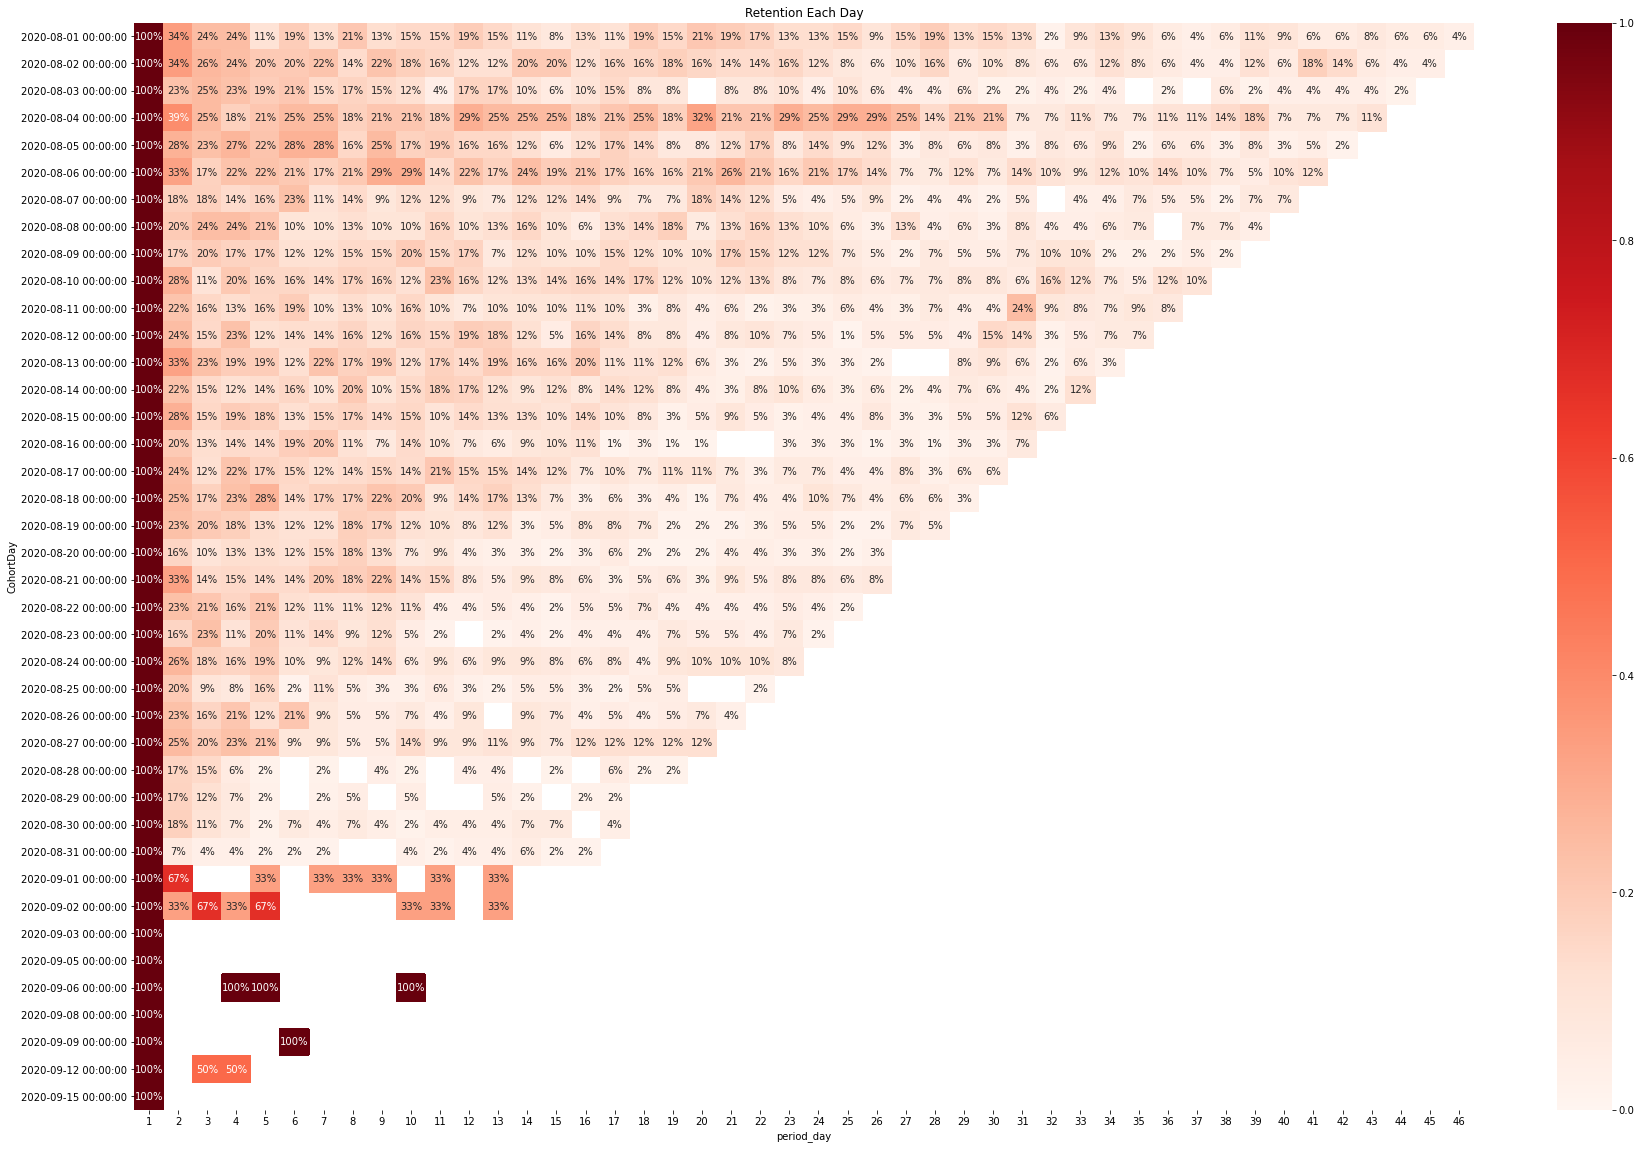

In [47]:
plt.figure(figsize=(30,20))
plt.title('Retention Each Day')
ax = sns.heatmap(data=retention2, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention2.index)
fig=ax.get_figure()
fig.savefig("Retention_each_day.png")
plt.show()

<font color='blue' size="5">ANALYZE AND VISUALIZE DATA IN WEEK FROM 31-35 (1/8/2020 - 5/9/2020) </font>

In [48]:
df.head()

,USER_ID,DATE,MERCHANT_TYPE,REVENUE,LOCATION,SHOP_TYPE
0,45329393,2020-08-01,Super Market,6.13,Hanoi,1
1,45329393,2020-08-01,Super Market,4.83,Hanoi,1
2,45329393,2020-08-01,Super Market,5.27,Hanoi,1
3,45329393,2020-08-01,Super Market,4.66,Hanoi,1
4,45329393,2020-08-01,Super Market,6.13,Hanoi,1


In [54]:
df_week=df

In [55]:
df_week['DATE']=df_week['DATE'].dt.week

In [56]:
df_week.head()

,USER_ID,DATE,MERCHANT_TYPE,REVENUE,LOCATION,SHOP_TYPE
0,45329393,31,Super Market,6.13,Hanoi,1
1,45329393,31,Super Market,4.83,Hanoi,1
2,45329393,31,Super Market,5.27,Hanoi,1
3,45329393,31,Super Market,4.66,Hanoi,1
4,45329393,31,Super Market,6.13,Hanoi,1


In [57]:
df_ret=df_week.loc[df_week['DATE'].isin([31,32,33,34,35])].sort_values(by=['DATE'])

In [58]:
retrev_mer=df_ret.groupby('MERCHANT_TYPE')['REVENUE'].sum().reset_index()

In [59]:
retrev_mer

,MERCHANT_TYPE,REVENUE
0,Convenience Store,49244.83
1,Super Market,98730.37


In [60]:
retuser_mer=df_ret.groupby('MERCHANT_TYPE')['USER_ID'].count().reset_index()

In [61]:
retuser_mer

,MERCHANT_TYPE,USER_ID
0,Convenience Store,4043
1,Super Market,7758


In [62]:
retrev_loc=df_ret.groupby('LOCATION')['REVENUE'].sum().reset_index()

In [63]:
retrev_loc

,LOCATION,REVENUE
0,Hanoi,53657.26
1,Ho Chi Minh,78703.67
2,Others,15614.27


In [64]:
retuser_loc=df_ret.groupby('LOCATION')['USER_ID'].count().reset_index()

In [65]:
retuser_loc

,LOCATION,USER_ID
0,Hanoi,4368
1,Ho Chi Minh,6382
2,Others,1051


In [70]:
retuser_shop=df_ret.groupby('SHOP_TYPE')['USER_ID'].count().reset_index()

In [71]:
retuser_shop

,SHOP_TYPE,USER_ID
0,1,1644
1,2,1366
2,3,2418
3,4,3502
4,5,2871


In [74]:
retrev_shop=df_ret.groupby('SHOP_TYPE')['REVENUE'].sum().reset_index()

In [75]:
retrev_shop

,SHOP_TYPE,REVENUE
0,1,21275.10
1,2,16578.90
2,3,30165.66
3,4,42295.13
4,5,37660.41


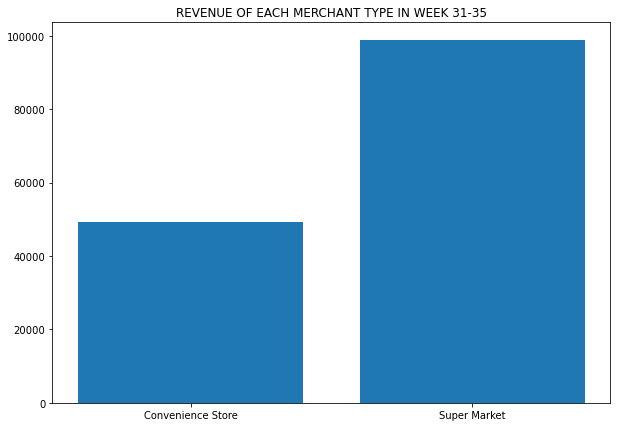

In [66]:
plt.figure(figsize =(10, 7)) 
plt.title('REVENUE OF EACH MERCHANT TYPE IN WEEK 31-35 (1/8/2020-5/9/2020)')
plt.bar(retrev_mer.MERCHANT_TYPE,retrev_mer.REVENUE) 
plt.savefig("REV_MER.png")
plt.show()

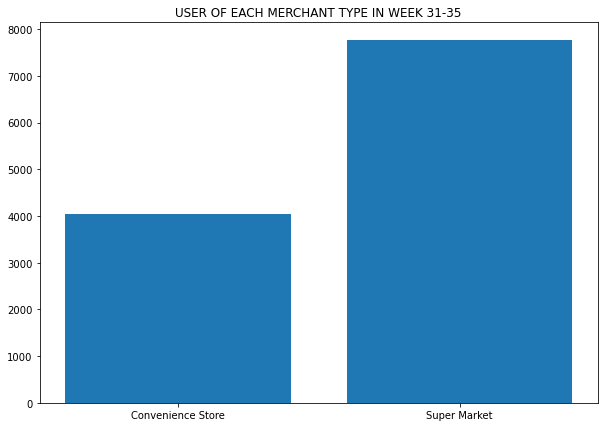

In [67]:
plt.figure(figsize =(10, 7)) 
plt.title('USER OF EACH MERCHANT TYPE IN WEEK 31-35 (1/8/2020-5/9/2020)')
plt.bar(retuser_mer.MERCHANT_TYPE,retuser_mer.USER_ID) 
plt.savefig("USER_MER.png")
plt.show()

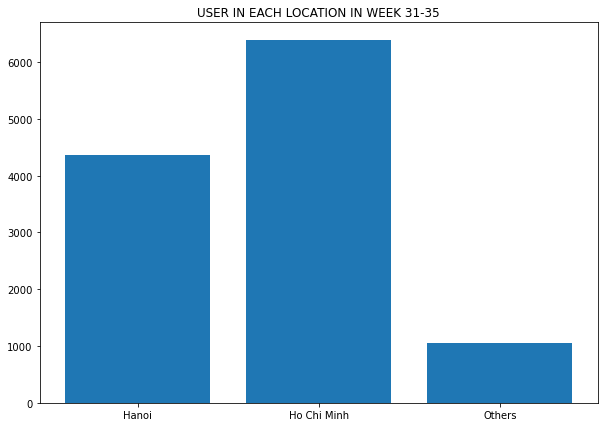

In [68]:
plt.figure(figsize =(10, 7)) 
plt.title('USER IN EACH LOCATION IN WEEK 31-35 (1/8/2020-5/9/2020)')
plt.bar(retuser_loc.LOCATION,retuser_loc.USER_ID) 
plt.savefig("USER_LOC.png")
plt.show()

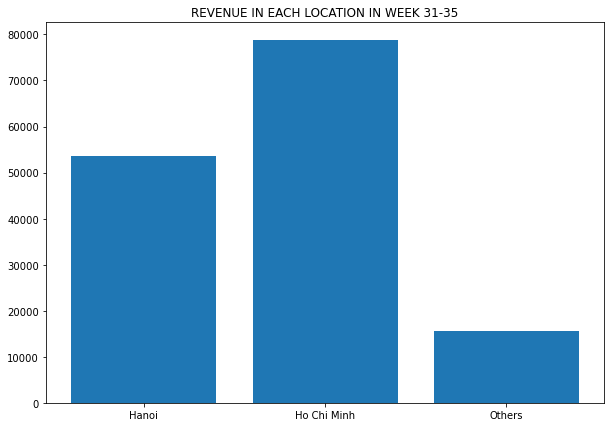

In [69]:
plt.figure(figsize =(10, 7)) 
plt.title('REVENUE IN EACH LOCATION IN WEEK 31-35 (1/8/2020-5/9/2020)')
plt.bar(retrev_loc.LOCATION,retrev_loc.REVENUE) 
plt.savefig("REV_LOC.png")
plt.show()

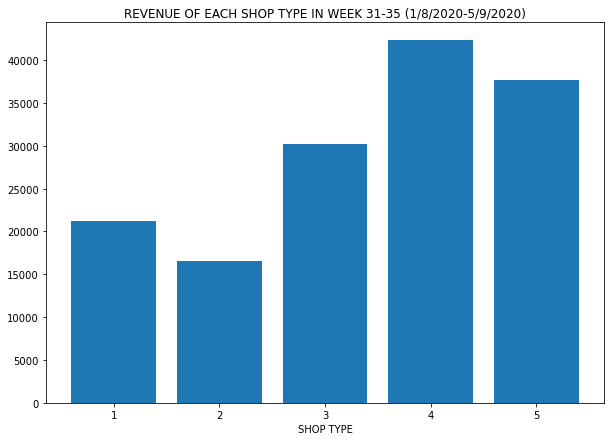

In [79]:
plt.figure(figsize =(10, 7)) 
plt.title('REVENUE OF EACH SHOP TYPE IN WEEK 31-35 (1/8/2020-5/9/2020)')
plt.bar(retrev_shop.SHOP_TYPE,retrev_shop.REVENUE)
plt.xlabel("SHOP TYPE")
plt.savefig("REV_SHOP.png")
plt.show()

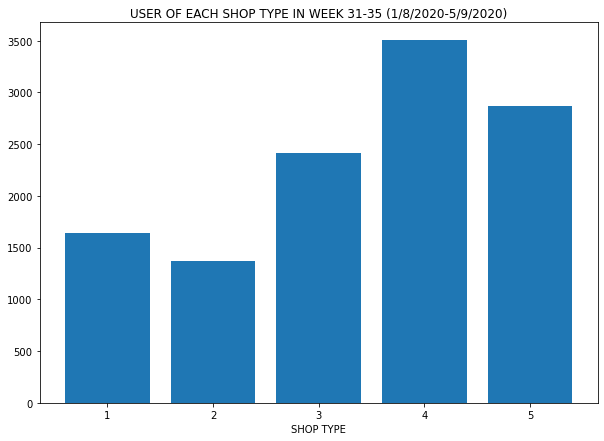

In [81]:
plt.figure(figsize =(10, 7)) 
plt.title('USER OF EACH SHOP TYPE IN WEEK 31-35 (1/8/2020-5/9/2020)')
plt.bar(retuser_shop.SHOP_TYPE,retuser_shop.USER_ID)
plt.xlabel("SHOP TYPE")
plt.savefig("USER_SHOP.png")
plt.show()

In [82]:
df_ret2=df_week.loc[df_week['DATE'].isin([33])].sort_values(by=['DATE'])

In [83]:
retuser_shop2=df_ret2.groupby('SHOP_TYPE')['USER_ID'].count().reset_index()

In [84]:
retuser_shop2

,SHOP_TYPE,USER_ID
0,1,347
1,2,312
2,3,546
3,4,742
4,5,622


In [85]:
retrev_shop2=df_ret2.groupby('SHOP_TYPE')['REVENUE'].sum().reset_index()

In [86]:
retrev_shop2

,SHOP_TYPE,REVENUE
0,1,4792.35
1,2,3639.78
2,3,7043.20
3,4,9510.15
4,5,9081.80
